<a href="https://colab.research.google.com/github/mirinai/BigdataPhysics_practice/blob/main/week_5_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pearson correlation
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
def pearson(a,b):
  return np.mean(((a-a.mean())*(b-b.mean()))/a.std()/b.std())

  #auto correlation

def autocorr(data,tau):
  return pearson(np.array(data[:-tau]),np.array(data[tau:]))

seoul = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Practices/seoul_alltemp.csv")
seoul


,date,minimum,average,maximum
0,1907-10-01,7.9,13.5,20.7
1,1907-10-02,7.9,16.2,22.0
2,1907-10-03,13.1,16.2,21.3
3,1907-10-04,11.2,16.5,22.0
4,1907-10-05,10.9,17.6,25.4
...,...,...,...,...
41116,2023-07-27,24.4,28.4,32.2
41117,2023-07-28,25.4,29.5,34.1
41118,2023-07-29,26.1,29.1,33.3
41119,2023-07-30,24.9,28.8,34.9


In [ ]:
autocorr(seoul['average'],1)

0.9746379136881984

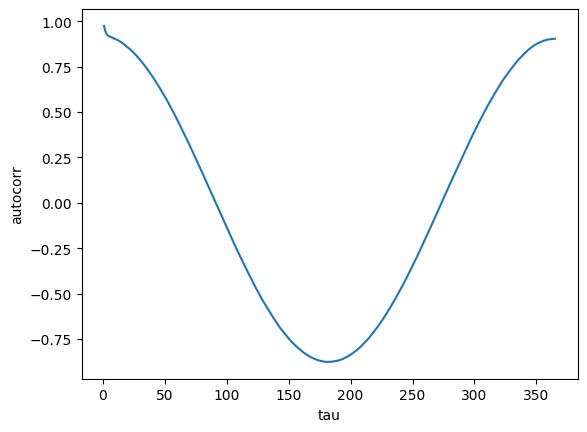

In [ ]:
tau = np.arange(1, 366, 1)  # 1부터 365까지의 값을 가진 배열로 수정합니다.
autocorr_values = np.zeros(365)  # autocorr_values 배열을 0으로 초기화합니다.

for i in range(365):
    autocorr_values[i] = autocorr(seoul['average'], tau[i])

plt.plot(tau[:365], autocorr_values)  # tau 배열의 범위를 [1, 365]로 변경하여 표시합니다.
plt.xlabel('tau')
plt.ylabel('autocorr')
plt.show()



In [ ]:
import yfinance as yf
start_date='1990-01-01'
end_date='2023-12-31'
ticker='AMZN'
data=yf.download(ticker,start_date,end_date)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [ ]:
start_date='2000-01-01'
end_date='2020-12-31'
ticker='^KS11'
kospi=yf.download(ticker,start_date,end_date)
kospi.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,1028.329956,1066.180054,1016.590027,1059.040039,1059.040039,195900
2000-01-05,1006.869995,1026.520020,984.049988,986.309998,986.309998,257700
2000-01-06,1013.950012,1014.900024,953.500000,960.789978,960.789978,203500
2000-01-07,949.169983,970.159973,930.840027,948.650024,948.650024,215700
2000-01-10,979.669983,994.940002,974.820007,987.239990,987.239990,240200


Text(0, 0.5, 'Kospi Open Price')

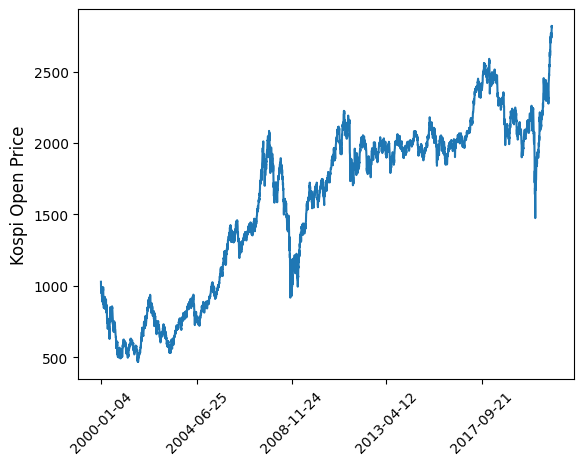

In [ ]:
open=kospi['Open']
date=kospi.index.date
plt.plot(open)
plt.xticks(date[::3*365],labels=date[::3*365],rotation=45)
plt.ylabel('Kospi Open Price',fontsize=12)



Text(0, 0.5, 'Kospi Daily Return')

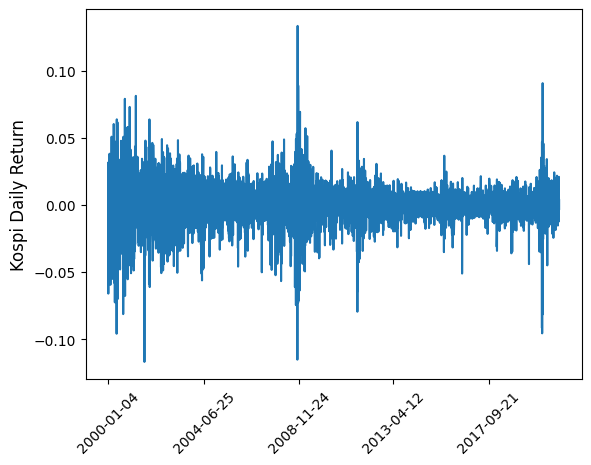

In [77]:
open=np.array(open)
log_return = np.log(open[1:] / open[:-1])

plt.plot(date[:-1], log_return)#마지막 거름
plt.xticks(date[:-1:3*365], labels=date[:-1:3*365], rotation=45)
plt.ylabel('Kospi Daily Return', fontsize=12)





Text(0.5, 0, 'Log return')

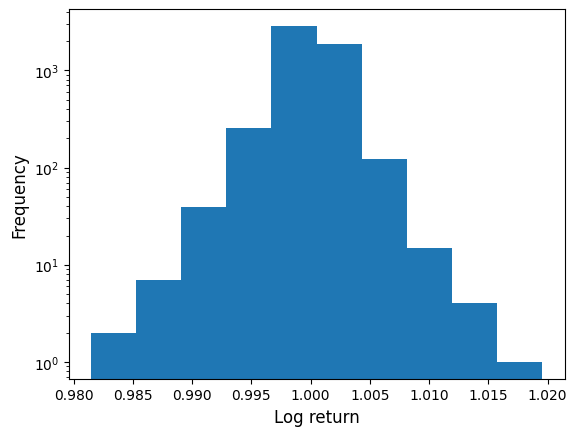

In [ ]:
plt.hist(log_return)
plt.yscale("log")
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Log return", fontsize=12)

Text(0.5, 0, 'ccdf')

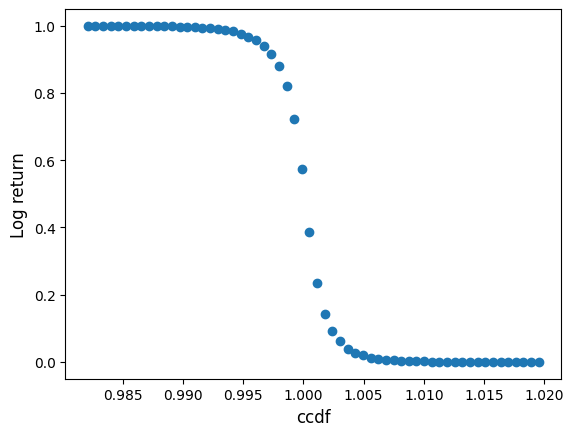

In [ ]:
count, bins_count = np.histogram(log_return, bins=60)

pdf = count/np.sum(count)
ccdf = 1-np.cumsum(pdf)
plt.scatter(bins_count[1:],ccdf)
plt.ylabel("Log return", fontsize=12)
plt.xlabel("ccdf", fontsize=12)
'''
주어진 코드는 주어진 데이터인 로그 수익률(log_return)에 대한 히스토그램과
이에 대한 누적 분포 함수(CCDF, Complementary Cumulative Distribution Function)를 계산하고 시각화하는 것입니다.

np.histogram: 주어진 데이터를 구간으로 나누어 히스토그램을 계산합니다.
bins=60은 데이터를 60개의 구간으로 나눈다는 것을 의미합니다.
이때, count에는 각 구간에 속하는 데이터 포인트의 개수가 저장되고, bins_count에는 구간의 경계값이 저장됩니다.

PDF와 CCDF 계산: 계산된 히스토그램을 바탕으로 확률 밀도 함수(PDF, Probability Density Function)와 CCDF를 계산합니다.
PDF는 각 구간의 빈도를 전체 데이터 개수로 나눈 값으로, 각 구간에 속하는 데이터의 비율을 나타냅니다.
CCDF는 누적 분포 함수의 보완으로, 각 구간의 확률의 보완값(1에서 각 구간까지의 누적 확률을 뺀 값)을 나타냅니다.

시각화: CCDF를 scatter plot을 사용하여 시각화합니다. x축에는 각 구간의 경계값(bins_count[1:])을,
y축에는 해당 구간 이상의 데이터가 나타날 확률을 나타냅니다. 이는 로그 수익률이 특정 값 이상일 확률을 시각화한 것입니다.

따라서 코드는 주어진 로그 수익률 데이터에 대한 CCDF를 계산하고 시각화한 것입니다.
이를 통해 로그 수익률이 특정 값 이상일 확률을 파악할 수 있습니다.



'''